## Keras Logistic Regression (data mnist)

In [67]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy
import pandas as pd

### Display Data

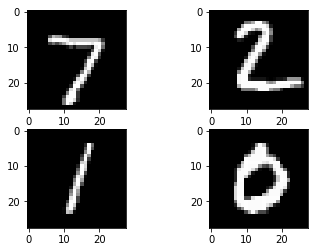

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [69]:
seed = 7
numpy.random.seed(seed)

### flatten array 28*28 images to a 784 vector for each image

In [70]:

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_train=X_train[:1000] #buat data training menjadi 1000 data
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_test=X_test[:100] #buat data test menjadi 100 data

### Normalize data from 0-255 to 0-1

In [71]:

X_train = X_train / 255
X_test = X_test / 255

In [72]:
y_train = np_utils.to_categorical(y_train)
y_train=y_train[:1000]
y_test = np_utils.to_categorical(y_test)
y_test=y_test[:100]
num_classes = y_test.shape[1]

### Build Model

In [73]:
def baseline_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [74]:
model = baseline_model(784,10)

### Train the model

In [77]:
%%time
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=5, verbose=2)

Train on 1000 samples, validate on 100 samples
Epoch 1/50
 - 3s - loss: 0.0908 - acc: 0.1150 - val_loss: 0.0924 - val_acc: 0.0800
Epoch 2/50
 - 1s - loss: 0.0897 - acc: 0.1570 - val_loss: 0.0916 - val_acc: 0.0800
Epoch 3/50
 - 1s - loss: 0.0885 - acc: 0.1900 - val_loss: 0.0907 - val_acc: 0.0900
Epoch 4/50
 - 1s - loss: 0.0874 - acc: 0.2310 - val_loss: 0.0898 - val_acc: 0.1200
Epoch 5/50
 - 1s - loss: 0.0861 - acc: 0.2660 - val_loss: 0.0889 - val_acc: 0.1500
Epoch 6/50
 - 1s - loss: 0.0848 - acc: 0.2880 - val_loss: 0.0878 - val_acc: 0.1500
Epoch 7/50
 - 1s - loss: 0.0834 - acc: 0.3360 - val_loss: 0.0867 - val_acc: 0.2000
Epoch 8/50
 - 1s - loss: 0.0820 - acc: 0.3720 - val_loss: 0.0856 - val_acc: 0.2300
Epoch 9/50
 - 1s - loss: 0.0804 - acc: 0.4070 - val_loss: 0.0843 - val_acc: 0.2700
Epoch 10/50
 - 1s - loss: 0.0788 - acc: 0.4460 - val_loss: 0.0830 - val_acc: 0.3100
Epoch 11/50
 - 1s - loss: 0.0771 - acc: 0.4730 - val_loss: 0.0816 - val_acc: 0.3500
Epoch 12/50
 - 1s - loss: 0.0754 - acc

### Model peformances

In [78]:
scores=model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.04566125512123108, 0.72]


In [79]:
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 28.00%


In [80]:
ynew=model.predict_classes(X_test[:1])
print(ynew)

[7]


X_test[0], Prediksi=7


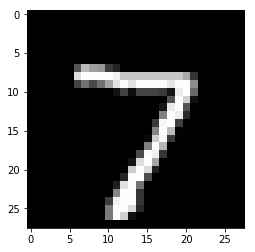

In [13]:
X_test1=X_test*255
X_test1=X_test1.reshape(10000,28,28)
for i in range(1):
    print("X_test%s, Prediksi=%s" % ([i], ynew[i]))
    plt.imshow(X_test1[i], cmap=plt.get_cmap('gray'))
    plt.show()